In [141]:
from sklearn.datasets import fetch_openml

In [142]:
mnist = fetch_openml('mnist_784', version=1)

In [143]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [144]:
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 
      

In [145]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [146]:
X, y = mnist["data"], mnist["target"]

In [147]:
X.shape

(70000, 784)

In [148]:
y.shape

(70000,)

In [149]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [150]:
some_digit = X.loc[0]
some_digit_image = some_digit.values.reshape(28, 28)

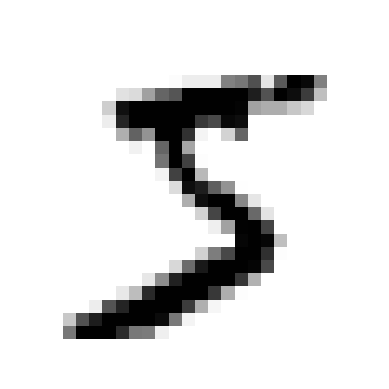

In [151]:
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [152]:
y[0]

'5'

In [153]:
import numpy as np
y = y.astype(np.uint8)

In [154]:
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: uint8

In [155]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000],y[60000:]

In [156]:
#Training a Binary Classifier

In [157]:
# let's only try to identify one digit 5

In [158]:
y_train_5 = (y_train == 5)  # True for all 5s, False for all other digits
y_test_5 = (y_test == 5)

In [159]:
# we choose SGD because he deals with training instances independently , and because our data is shuflled !

In [160]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [161]:
sgd_clf.score(X_train, y_train_5)

0.9522666666666667

In [162]:
# this is a good score 

In [163]:
sgd_clf.predict([some_digit])

/home/mouhsine/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [164]:
some_digit.name

0

In [165]:
#Performance Measures

# 1 - Using Cross-Validation

In [166]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [167]:
skfolds = StratifiedKFold(n_splits=3)#shuffle=True
#IMPLEMENTING CROSS-VALIDATION

In [168]:
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds , X_test_fold  = X_train.iloc[train_index]  , X_train.iloc[test_index]
    y_train_folds , y_test_fold = y_train_5.iloc[train_index] , y_train_5.iloc[test_index]
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.95035
0.96035
0.9604


In [169]:
skfolds.split(X_train, y_train_5)

<generator object _BaseKFold.split at 0x7f2c482355a0>

In [170]:
from sklearn.model_selection import cross_val_score

In [171]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3,scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [172]:
#“not-5” class

In [173]:
from sklearn.base import BaseEstimator

In [174]:
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [175]:
never_5_clf = Never5Classifier()

In [176]:
cross_val_score(never_5_clf, X_train, y_train_5, cv=3,scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [177]:
# that means if you always guess that an image is not a 5, you will be right about 90% of the time

2- Confusion Matrix

In [178]:
# with this method we need fisrt some predicted sets 

In [179]:
from sklearn.model_selection import cross_val_predict

In [180]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [181]:
import numpy as np
np.count_nonzero(y_train_pred)

4217

In [182]:
# now we can get the cunfusion_matrix

In [183]:
from sklearn.metrics import confusion_matrix


In [184]:
confusion_matrix(y_train_5, y_train_pred)# look at the true positive 538992 and the false negative 1891 of the matrix below

array([[53892,   687],
       [ 1891,  3530]])

In [185]:

y_train_perfect_predictions = y_train_5 # pretend we reachedperfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

In [186]:
#Precision and Recall

In [187]:
from sklearn.metrics import precision_score, recall_score

In [188]:
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [189]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [190]:
#the harmonic mean of precision and recall to give much more weight to low values.

In [191]:
from sklearn.metrics import  f1_score

In [192]:
f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [193]:
# increasing precision reduces recall, and vice versa. depends on the project

In [194]:
y_scores = sgd_clf.decision_function([some_digit]) # this how we set the threshold manually with the decision_function()

/home/mouhsine/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


In [195]:
y_scores

array([2164.22030239])

In [196]:
threshold = 8111 # so increasing the treshold increase the prediction and decsresae the recall ( p=100% r=50%)

In [197]:
y_some_digit_pred = (y_scores > threshold)

In [198]:
y_some_digit_pred

array([False])

In [199]:
# the question here is how to choose to correct threshold ? use cros_val_predict()

In [200]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

In [201]:
# and then the precision_recall_curve() function to compute precision and recall for all possible thresholds

In [202]:
from sklearn.metrics import precision_recall_curve

In [203]:
precisions,recalls,thresholds = precision_recall_curve(y_train_5,y_scores)

In [204]:
# and then plot the precisions and recalls as a function of threshold using Matplotlib

In [205]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds,highlight_threshold):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    if highlight_threshold is not None:
        plt.axvline(x=highlight_threshold, color='red', linestyle='--', label='Threshold Highlight')
    plt.legend()
    #plt.xlabel("Threshold")
    #plt.ylabel("Score")
    plt.grid(True)
    # highlight the threshold and add the legend, axis label, and grid

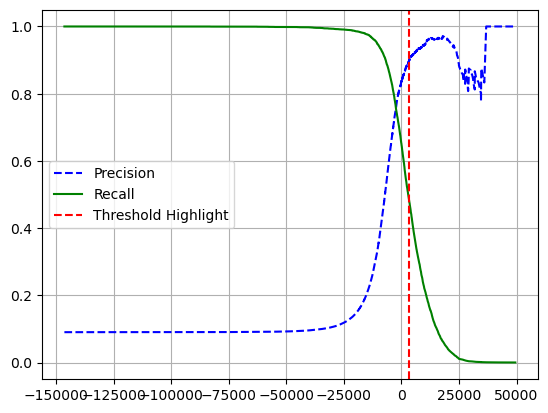

In [206]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds,highlight_threshold=3370.0194991439557)
plt.show()

In [207]:
#recall can only go down when the threshold is increased

In [208]:
# or to plot the precision vs recall 

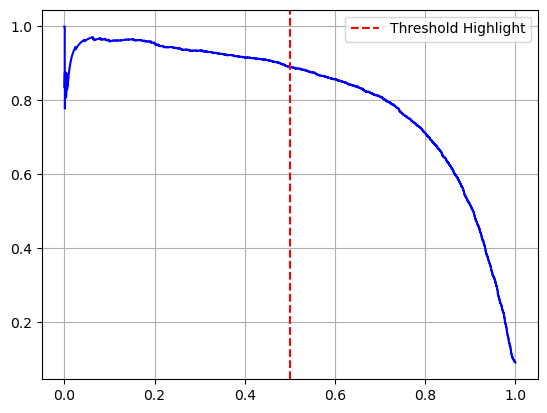

In [209]:
plt.plot(recalls[:-1], precisions[:-1], 'b-')
plt.grid(True)
plt.axvline(x=0.5, color='red', linestyle='--', label='Threshold Highlight')
#plt.axhline(y=9, color='red', linestyle='--', label='Threshold Highlight')
#plt.xlabel('recall')
#plt.ylabel('precision')
plt.legend()
plt.show()

In [210]:
# we want to select a precision/recall trade-off just before that drop—for example . this depends on the project!! 
# here we may shoose 80% or 60% 

In [211]:
# now we want the precision of 90% , use this function np.argmax()

In [212]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

In [213]:
threshold_90_precision # then use the first function to review the recall 

3370.0194991439557

In [214]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [215]:
y_train_pred_90

array([False, False, False, ...,  True, False, False])

In [216]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [217]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

In [218]:
# 4_ The ROC Curve

In [219]:
from sklearn.metrics import roc_curve

In [220]:
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [221]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [222]:
y_train_5

0         True
1        False
2        False
3        False
4        False
         ...  
59995    False
59996    False
59997     True
59998    False
59999    False
Name: class, Length: 60000, dtype: bool

In [223]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal

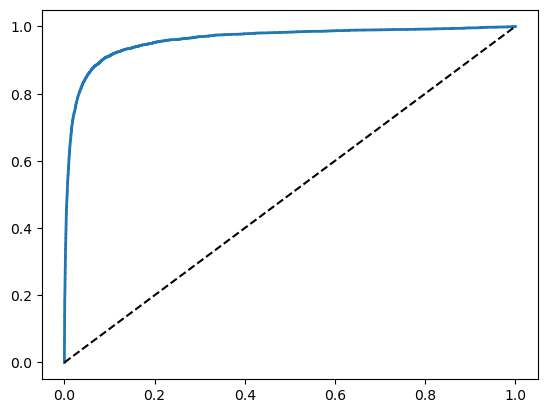

In [224]:
plot_roc_curve(fpr, tpr)
plt.show()

In [225]:
# The dotted line represents the ROC curve and good classifier stays as far away from that line as possible

In [226]:
# and now we measure the area under the curve (AUC) using the function roc_auc_score , the good one has 1 in his score

In [227]:
from sklearn.metrics import roc_auc_score

In [228]:
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [229]:
# the score is good but in general we prefer to use the precision/recall (PR) curve is more confident that the ROC curve 

In [230]:
# now let's plot the ROC curve for the RandomforestClassifier 

In [231]:
from sklearn.ensemble import RandomForestClassifier

In [232]:
# the model hasn't the decision_function but has predict_proba()

In [233]:
forest_clf=RandomForestClassifier(random_state=42)

In [234]:
y_proba_forest=cross_val_predict(forest_clf, X_train, y_train_5, cv=3,method="predict_proba")

In [235]:
y_scores_forest = y_proba_forest[:, 1] # because the ROc funtion expect labels and scores 

In [236]:
fpr_forest, tpr_forest, thresholds_forest =roc_curve(y_train_5,y_scores_forest)

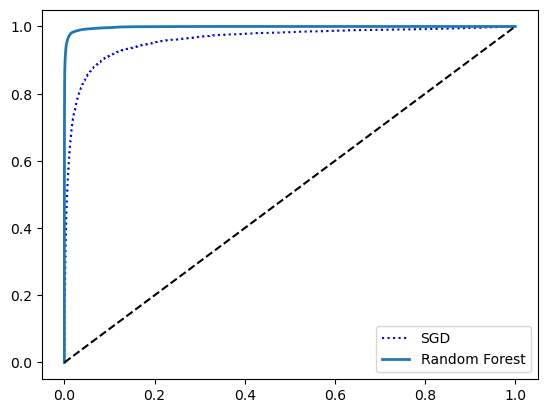

In [237]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [238]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [239]:
forest_clf.fit(X_train, y_train_5)
y_pred = forest_clf.predict(X_train)
precision_score(y_train_5,y_pred)

1.0

In [240]:
recall_score(y_train_5, y_pred)

1.0

Multi calss algorithm 

In [241]:
# we begin with the SVM ML to do the classification of all the data set , means from 0 to 9

In [242]:
from sklearn.svm import SVC

In [243]:
svm_clf = SVC()
svm_clf.fit(X_train, y_train) # y_train, not y_train_5 , this all the data SET 

SVC()

In [244]:
svm_clf.predict([some_digit])

/home/mouhsine/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([5], dtype=uint8)

In [245]:
some_digit

pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Name: 0, Length: 784, dtype: float64

In [246]:
svm_clf.score(X_train, y_train)

0.9899166666666667

In [247]:
# so this algorithm use the OvO strategy wish means one versus one and train 45 classifier 

In [248]:
# we can force Scikit-Learn to use OvR ( one versus the rest ) using the classifier OneVsRestClassifier and do the same train the model , fit it amd them predect the image of the numbe

In [249]:
# you should here continue your project it's not done yet

..............................

In [251]:
some_digit_scores = svm_clf.decision_function([some_digit])

/home/mouhsine/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [252]:
some_digit_scores

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [253]:
# The highest score is indeed the one corresponding to class 5

In [254]:
np.argmax(some_digit_scores)

5

In [255]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [256]:
# let's use a random classifier

In [258]:
from sklearn.preprocessing import StandardScaler

In [259]:
scaler = StandardScaler()

In [260]:
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [261]:
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3,scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

In [262]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train,cv=3)

In [266]:
conf_mx=confusion_matrix(y_train,y_train_pred)

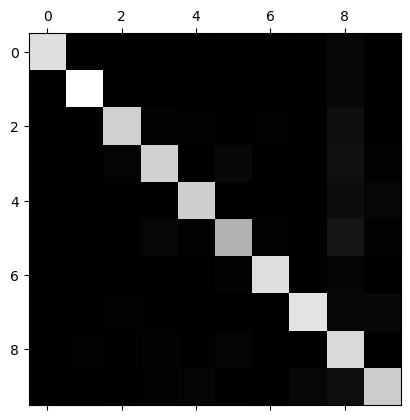

In [268]:
plt.matshow(conf_mx,cmap=plt.cm.gray)

In [269]:
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

In [270]:
# looks pretty good since the most image are on the main diagonal , that means that the classifier was correct

In [271]:
# but let's look at the errors , or how the classifier could recongnize the non_5

In [272]:
row_sums = conf_mx.sum(axis=1, keepdims=True)

In [273]:
row_sums

array([[5923],
       [6742],
       [5958],
       [6131],
       [5842],
       [5421],
       [5918],
       [6265],
       [5851],
       [5949]])

In [274]:
norm_conf_mx = conf_mx / row_sums

In [278]:
np.fill_diagonal(norm_conf_mx, 0) 
# we fill the diagonal with zero to keep just the errors on the matrix

In [283]:
#plt.matshow(norm_conf_mx,cmap=plt.cm.gray)
#plt.show()
norm_conf_mx

array([[0.        , 0.        , 0.00371433, 0.00084417, 0.00135067,
        0.00725983, 0.006078  , 0.001013  , 0.03798751, 0.00016883],
       [0.        , 0.        , 0.00548799, 0.00355977, 0.0005933 ,
        0.00652625, 0.0005933 , 0.00103827, 0.03144468, 0.00148324],
       [0.00453172, 0.00453172, 0.        , 0.01544142, 0.01225243,
        0.00453172, 0.01124538, 0.0060423 , 0.06344411, 0.00184626],
       [0.00358832, 0.00277279, 0.01908335, 0.        , 0.00032621,
        0.03311042, 0.00440385, 0.00652422, 0.06573153, 0.0119067 ],
       [0.00205409, 0.00239644, 0.00701814, 0.00154057, 0.        ,
        0.00205409, 0.00581992, 0.0046217 , 0.05939747, 0.02807258],
       [0.00498063, 0.00276702, 0.00553403, 0.03099059, 0.00977679,
        0.        , 0.01383509, 0.00258255, 0.09869028, 0.01106807],
       [0.00506928, 0.00253464, 0.00709699, 0.00050693, 0.00743494,
        0.01639067, 0.        , 0.00050693, 0.02213586, 0.00016898],
       [0.00335196, 0.00159617, 0.0081404

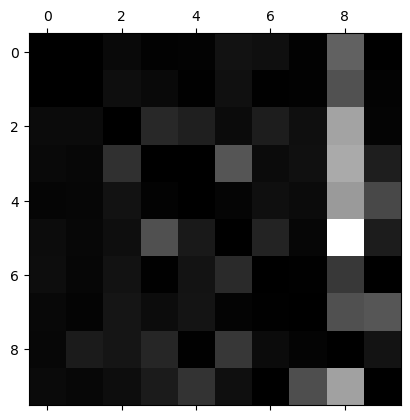

In [284]:
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)

In [287]:
#The column for class 8 is quite bright, which tells you that many images get misclassified as 8s
# also 3s and 5s often get confused
# the classifier is not symetric

In [288]:
cl_a, cl_b = 3, 5 

In [289]:
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]

In [290]:
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]

In [291]:
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

In [292]:
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

In [293]:
plt.figure(figsize=(8,8))

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

In [313]:
X_aa[:25]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [314]:
len(X_aa[2:])


5225

In [307]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

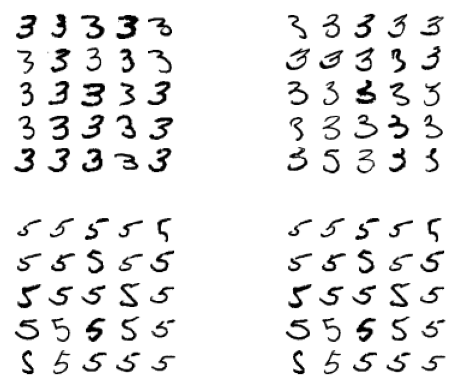

In [312]:
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)

In [315]:
from sklearn.neighbors import KNeighborsClassifier

In [317]:
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

In [321]:
y_train_odd [:12]

0      True
1     False
2     False
3      True
4      True
5     False
6      True
7      True
8      True
9     False
10     True
11     True
Name: class, dtype: bool

In [322]:
knn_clf = KNeighborsClassifier()

In [323]:
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [325]:
X_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [326]:
knn_clf.predict([some_digit])

/home/mouhsine/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[False,  True]])

In [327]:
#not large (False) and odd (True)

In [328]:
y_train_knn_pred = cross_val_predict(knn_clf,X_train,y_multilabel, cv=3)

In [330]:
f1_score(y_multilabel,y_train_knn_pred,average="macro")

0.976410265560605

In [332]:
#all labels are equally important 
# this classifier train to tell if the predicted is large and if it's odd 

In [333]:
# you may want to give more weight to a classifier's more than anther

In [334]:
knn_clf

KNeighborsClassifier()

Multioutput Classification

In [335]:
# to do so, let's build a system that removes noise from images

In [336]:
noise = np.random.randint(0, 100, (len(X_train), 784))

In [337]:
X_train_mod = X_train + noise

In [338]:
noise = np.random.randint(0, 100, (len(X_test), 784))

In [339]:
X_test_mod = X_test + noise

In [340]:
y_train_mod = X_train

In [341]:
y_test_mod = X_test

In [342]:
knn_clf.fit(X_train_mod, y_train_mod)

KNeighborsClassifier()

In [348]:

knn_clf

KNeighborsClassifier()

In [362]:
some_index = 0
clean_digit = knn_clf.predict([X_test_mod.iloc[some_index]])

/home/mouhsine/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [364]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

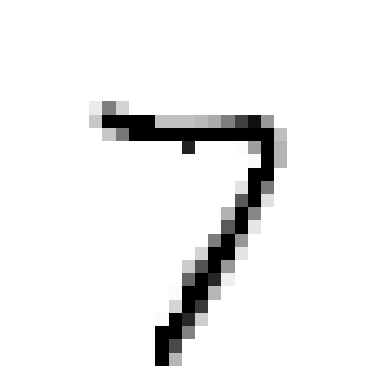

In [383]:
plot_digit(clean_digit)